<a href="https://colab.research.google.com/github/vgangapuram/Repo_Python_pandas/blob/main/School_Store_Revenue_%26_Student_Performance_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Description:

You are managing a school that tracks both student exam performance and sales from the school store. You need to analyze both and build a unified report that provides:

Academic performance insights of students
Contribution of each student to store sales
A combined view showing how well students are performing academically and economically (via purchases)

Project Requirements

🗂️ Inputs (CSV Files)
students.csv
Name,Math,Science,English
Alice,85,78,92
Bob,65,70,60
Charlie,95,88,90
David,40,50,45
Eva,76,85,80

sales.csv
OrderID,Student,Item,Quantity,Price
101,Alice,Notebook,2,50
102,Bob,Pencil,5,10
103,Alice,Pen,1,30
104,Charlie,Notebook,3,50
105,Eva,Pen,2,30
Tasks to Implement:
Load both CSV files using pandas.
Calculate average score per student and assign a "Result" (Distinction, Pass, Fail).
Calculate total store spending per student (Quantity × Price).
Merge both datasets using the "Name"/"Student" column to create a unified report.
Add a column "High Spender" if spending > ₹100.
Save the final merged DataFrame to a new file: student_dashboard.csv.

In [9]:
data = """OrderID,Student,Item,Quantity,Price
101,Alice,Notebook,2,50
102,Bob,Pencil,5,10
103,Alice,Pen,1,30
104,Charlie,Notebook,3,50
105,Eva,Pen,2,30
"""

# Write data to a CSV file
with open("sales.csv", "w") as f:
    f.write(data)
df1 = pd.read_csv("sales.csv")

In [10]:
data = """Name,Math,Science,English
Alice,85,78,92
Bob,65,70,60
Charlie,95,88,90
David,40,50,45
Eva,76,85,80
"""

# Write data to a CSV file
with open("students.csv", "w") as f:
    f.write(data)
df2 = pd.read_csv("students.csv")


In [14]:
# Calculate average score per student and assign a "Result" (Distinction, Pass, Fail).
df2['Average']=df2[['Math','Science','English']].mean(axis=1)
print(df2['Average'])
avg=df2['Average']


0    85.000000
1    65.000000
2    91.000000
3    45.000000
4    80.333333
Name: Average, dtype: float64


In [18]:
def assign(avg):
  if avg>90:
    return 'Distinction'
  if 75<=avg<90:
    return 'Pass'
  else:
    return 'Fail'
df2['Result']=df2['Average'].apply(assign)
print(df2['Result'])

0           Pass
1           Fail
2    Distinction
3           Fail
4           Pass
Name: Result, dtype: object


In [21]:
#Calculate total store spending per student (Quantity × Price)
df1['Revenue']=df1['Quantity']*df1['Price']
print(df1['Revenue'])
total_Revenue=df1['Revenue'].sum()

0    100
1     50
2     30
3    150
4     60
Name: Revenue, dtype: int64


#Merge both datasets using the "Name"/"Student" column to create a unified report.

In [23]:
#Since one file uses "Name" and the other uses "Student", we need to align them:
df1.rename(columns={'Student':'Name'},inplace=True)


In [30]:
df_merged= pd.merge(df2,df1, on='Name',how='left')
print(df_merged)

      Name  Math  Science  English    Average       Result  OrderID      Item  \
0    Alice    85       78       92  85.000000         Pass    101.0  Notebook   
1    Alice    85       78       92  85.000000         Pass    103.0       Pen   
2      Bob    65       70       60  65.000000         Fail    102.0    Pencil   
3  Charlie    95       88       90  91.000000  Distinction    104.0  Notebook   
4    David    40       50       45  45.000000         Fail      NaN       NaN   
5      Eva    76       85       80  80.333333         Pass    105.0       Pen   

   Quantity  Price  Total_sales  Revenue  
0       2.0   50.0        100.0    100.0  
1       1.0   30.0         30.0     30.0  
2       5.0   10.0         50.0     50.0  
3       3.0   50.0        150.0    150.0  
4       NaN    NaN          NaN      NaN  
5       2.0   30.0         60.0     60.0  


In [31]:
#Add a column "High Spender" if spending > 100.
# Safely handle missing values too (in case Total_sales is NaN)

df_merged['High Spender'] = df_merged['Total_sales'].apply(
    lambda x: 'Yes' if pd.notna(x) and x > 100 else 'No'
)


.apply() is used to go row-by-row through the Total_sales column

lambda x: is an inline function for each value x

pd.notna(x) ensures you're not comparing against a NaN value

In [38]:
#Save the final merged DataFrame to a new file: student_dashboard.csv.
df_merged.to_csv('student_dashboard.csv', index=True)
df = pd.read_csv('student_dashboard.csv') # read the csv file
print(df)

   Unnamed: 0     Name  Math  Science  English    Average       Result  \
0           0    Alice    85       78       92  85.000000         Pass   
1           1    Alice    85       78       92  85.000000         Pass   
2           2      Bob    65       70       60  65.000000         Fail   
3           3  Charlie    95       88       90  91.000000  Distinction   
4           4    David    40       50       45  45.000000         Fail   
5           5      Eva    76       85       80  80.333333         Pass   

   OrderID      Item  Quantity  Price  Total_sales  Revenue High Spender  
0    101.0  Notebook       2.0   50.0        100.0    100.0           No  
1    103.0       Pen       1.0   30.0         30.0     30.0           No  
2    102.0    Pencil       5.0   10.0         50.0     50.0           No  
3    104.0  Notebook       3.0   50.0        150.0    150.0          Yes  
4      NaN       NaN       NaN    NaN          NaN      NaN           No  
5    105.0       Pen       2.0 

<ipython-input-40-20202fe325eb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Color'] = df_unique.apply(


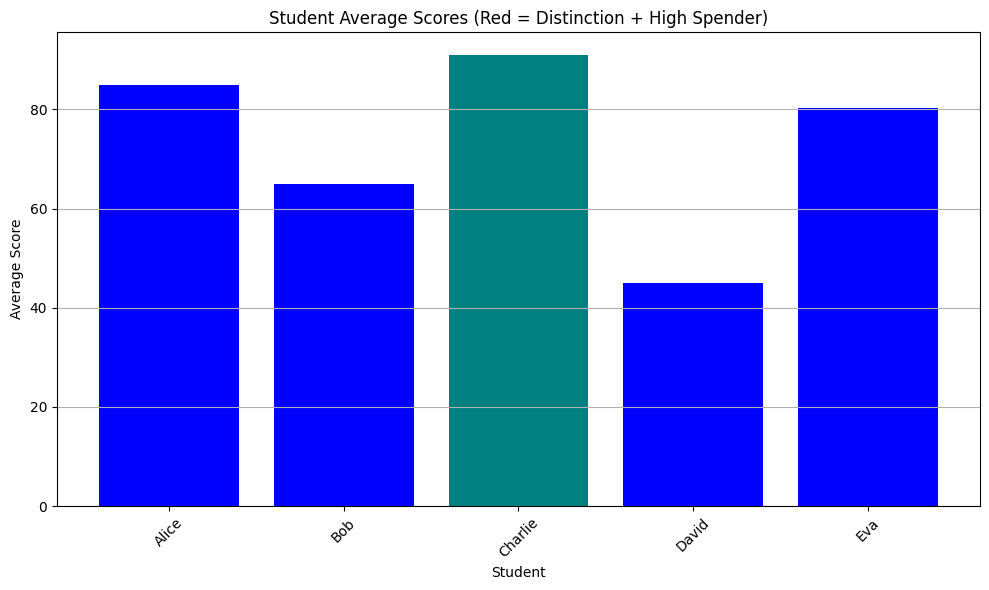

In [40]:

import matplotlib.pyplot as plt

# Load the final dashboard (or use df_merged directly if it's already in memory)
df = pd.read_csv('student_dashboard.csv')

# Replace NaNs in spending with 0
df['Total_sales'] = df['Total_sales'].fillna(0)

# Drop duplicate names (in case of multiple purchases per student)
df_unique = df.drop_duplicates(subset='Name', keep='first')

# Define colors: red if both Distinction + High Spender, else gray
df_unique['Color'] = df_unique.apply(
    lambda row: 'teal' if row['Result'] == 'Distinction' and row['High Spender'] == 'Yes' else 'blue',
    axis=1
)

# Plotting
plt.figure(figsize=(10,6))
plt.bar(df_unique['Name'], df_unique['Average'], color=df_unique['Color'])
plt.xlabel('Student')
plt.ylabel('Average Score')
plt.title('Student Average Scores (Red = Distinction + High Spender)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


